<a href="https://colab.research.google.com/github/ActnCreate/Project1/blob/main/Project1_Game_industry_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Getting the data ready

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt 
from matplotlib.pyplot import figure
import seaborn as sns
%matplotlib inline

df = pd.read_csv(r'/content/vgames2.csv')

# Unifying the units of each values in Sales columns to mil
# Changing the data type of Sales column values to float

# NA_Sales
df_K = df[df['NA_Sales'].str.contains('K')]
df_K2 = df_K['NA_Sales'].str.replace('K', ' ')
df_K3 = df_K2.astype(float)
df_K4 = df_K3*0.001

df_M = df[df['NA_Sales'].str.contains('M')]
df_M2 = df_M['NA_Sales'].str.replace('M', ' ')
df_M3 = df_M2.astype(float)

df['NA_Sales'].update(df_K4)
df['NA_Sales'].update(df_M3)
df['NA_Sales'] = df['NA_Sales'].astype(float)

#EU_Sales
df_EUK = df[df['EU_Sales'].str.contains('K')]
df_EUK2 = df_EUK['EU_Sales'].str.replace('K', ' ')
df_EUK3 = df_EUK2.astype(float)
df_EUK4 = df_EUK3*0.001

df_EUM = df[df['EU_Sales'].str.contains('M')]
df_EUM2 = df_EUM['EU_Sales'].str.replace('M', ' ')
df_EUM3 = df_EUM2.astype(float)

df['EU_Sales'].update(df_EUK4)
df['EU_Sales'].update(df_EUM3)
df['EU_Sales'] = df['EU_Sales'].astype(float)

#JP_Sales
df_JPK = df[df['JP_Sales'].str.contains('K')]
df_JPK2 = df_JPK['JP_Sales'].str.replace('K', ' ')
df_JPK3 = df_JPK2.astype(float)
df_JPK4 = df_JPK3*0.001

df_JPM = df[df['JP_Sales'].str.contains('M')]
df_JPM2 = df_JPM['JP_Sales'].str.replace('M', ' ')
df_JPM3 = df_JPM2.astype(float)

df['JP_Sales'].update(df_JPK4)
df['JP_Sales'].update(df_JPM3)
df['JP_Sales'] = df['JP_Sales'].astype(float)

#Other_Sales
df_OK = df[df['Other_Sales'].str.contains('K')]
df_OK2 = df_OK['Other_Sales'].str.replace('K', ' ')
df_OK3 = df_OK2.astype(float)
df_OK4 = df_OK3*0.001

df_OM = df[df['Other_Sales'].str.contains('M')]
df_OM2 = df_OM['Other_Sales'].str.replace('M', ' ')
df_OM3 = df_OM2.astype(float)

df['Other_Sales'].update(df_OK4)
df['Other_Sales'].update(df_OM3)
df['Other_Sales'] = df['Other_Sales'].astype(float)

df.isnull().sum()

Unnamed: 0       0
Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [2]:
# Sales per Genre
NA_Genre_sum = df.groupby('Genre').NA_Sales.sum()
NA_Genre_sum_df = pd.DataFrame(data = NA_Genre_sum)

EU_Genre_sum = df.groupby('Genre').EU_Sales.sum()
EU_Genre_sum_df = pd.DataFrame(data = EU_Genre_sum)

JP_Genre_sum = df.groupby('Genre').JP_Sales.sum()
JP_Genre_sum_df = pd.DataFrame(data = JP_Genre_sum)

Oth_Genre_sum = df.groupby('Genre').Other_Sales.sum()
Oth_Genre_sum_df = pd.DataFrame(data = Oth_Genre_sum)

from functools import reduce

All_Genre_sum = [NA_Genre_sum_df, EU_Genre_sum_df, JP_Genre_sum_df, Oth_Genre_sum_df]

Genre_sum_merged = reduce(lambda  left, right: pd.merge(left,right,on=['Genre'], how='outer'), All_Genre_sum)
Genre_sum_merged

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,874.81,522.16,157.90,186.45
Adventure,105.66,64.05,51.95,16.81
Fighting,223.20,101.22,87.34,36.64
Misc,408.05,212.36,105.27,74.04
Platform,446.44,201.61,130.65,51.53
Puzzle,123.35,50.73,56.87,12.52
Racing,357.19,237.10,56.40,77.10
Role-Playing,319.54,183.58,344.95,56.96
Shooter,581.92,313.05,38.28,102.65


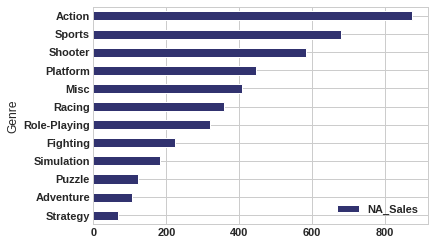

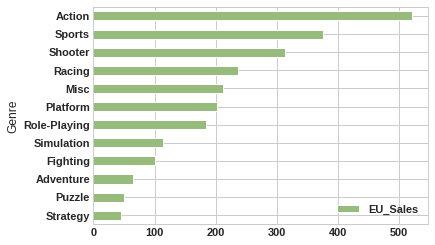

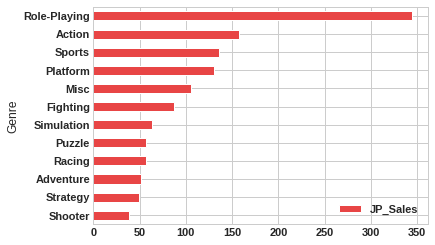

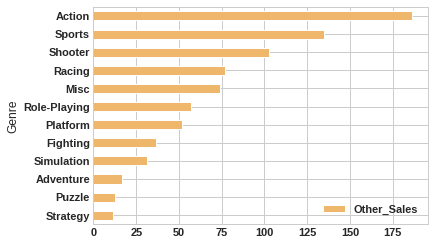

In [37]:
NA_Genre_sorted = NA_Genre_sum_df.sort_values('NA_Sales')
EU_Genre_sorted = EU_Genre_sum_df.sort_values('EU_Sales')
JP_Genre_sorted = JP_Genre_sum_df.sort_values('JP_Sales')
Oth_Genre_sorted = Oth_Genre_sum_df.sort_values('Other_Sales')

NA_Genre_sorted.plot.barh(color = '#31326f');
EU_Genre_sorted.plot.barh(color = '#96bb7c');
JP_Genre_sorted.plot.barh(color = '#e84545');
Oth_Genre_sorted.plot.barh(color = '#eeb76b');

In [4]:
df_genre = df.groupby('Genre').sum()
df_genre.drop(['Unnamed: 0', 'Year'], axis = 1, inplace = True)
df_genre['Sum'] = df_genre.sum(axis=1)

df_genre

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Sum
Genre,,,,,
Action,874.81,522.16,157.90,186.45,1741.32
Adventure,105.66,64.05,51.95,16.81,238.47
Fighting,223.20,101.22,87.34,36.64,448.40
Misc,408.05,212.36,105.27,74.04,799.72
Platform,446.44,201.61,130.65,51.53,830.23
Puzzle,123.35,50.73,56.87,12.52,243.47
Racing,357.19,237.10,56.40,77.10,727.79
Role-Playing,319.54,183.58,344.95,56.96,905.03
Shooter,581.92,313.05,38.28,102.65,1035.90


In [5]:
game_total = df_genre.sum(axis=0).to_frame()
game_total
market_share = {'NA':4372.34/8863.70*100, 'EU':2421.01/8863.70*100, 'JP':1278.14/8863.70*100, 'Others':792.21/8863.70*100}
market_share_df = pd.DataFrame(data = market_share, index = ['Market Share']).T
market_share_df

,Market Share
NA,49.328610
EU,27.313763
JP,14.419937
Others,8.937690


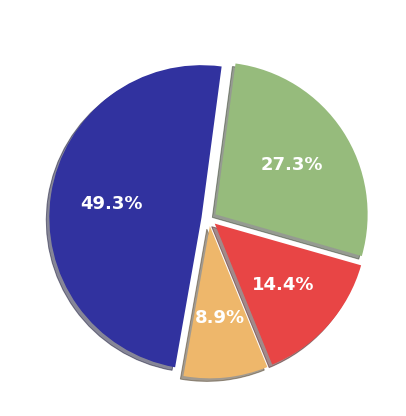

In [6]:
ratio = [49.33, 27.31, 14.42, 8.94]
labels = [ 'NA', 'EU', 'JP', 'Others']
explode = [0.05, 0.05, 0.05, 0.05]
colors = ['#31329f','#96bb7c','#e84545','#eeb76b']
plt.rcParams['font.size'] = 18
plt.rcParams['text.color'] = 'White'
plt.rcParams["font.weight"] = "bold"
fig = plt.gcf()
fig.set_size_inches(7, 7)
plt.title("Market Share")
plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False, explode=explode, shadow=True, colors=colors)
plt.show()

In [7]:
total_num_games = df['Genre'].value_counts().sum()

gen_count = df['Genre'].value_counts()
gen_count_df = gen_count.to_frame()
gen_count_df['Proportion'] = gen_count_df['Genre']/total_num_games*100
gen_count_df

,Genre,Proportion
Action,3305,19.972202
Sports,2341,14.146725
Misc,1734,10.478608
Role-Playing,1483,8.961808
Shooter,1308,7.904278
Adventure,1280,7.735074
Racing,1243,7.511482
Platform,884,5.342035
Simulation,865,5.227218
Fighting,847,5.118443


In [9]:
# Checking Values in 'Year' column
df['Year'].value_counts().to_frame().sort_index()

# Unifying units of values in 'Year' column 
df.replace({'Year' : 
            {0:2000, 1:2001, 2:2002, 3:2003, 4:2004, 5:2005, 6:2006, 7:2007, 8:2008, 9:2009, 
             10:2010, 11:2011, 12:2012, 13:2013, 14:2014, 15:2015, 16:2016,
            86:1986, 94:1994, 95:1995, 96:1996, 97:1997, 98:1998}
           }, inplace = True)

In [11]:
k = df[df['Year'].isna()]
k2 = k.value_counts('Genre')
k_proportion = k2/k2.sum()*100
print(k_proportion, gen_count_df)

#Conclusion : Proportion of genres with missing 'Year' value is similar to the proportion of the genres overall. 
#There won't be much difference in trend analysis even if the NA values are discarded.

Genre
Action          23.247232
Sports          15.498155
Misc            10.701107
Shooter         10.332103
Racing           8.487085
Role-Playing     6.273063
Simulation       5.904059
Fighting         4.428044
Puzzle           4.059041
Strategy         3.690037
Platform         3.690037
Adventure        3.690037
dtype: float64               Genre  Proportion
Action         3305   19.972202
Sports         2341   14.146725
Misc           1734   10.478608
Role-Playing   1483    8.961808
Shooter        1308    7.904278
Adventure      1280    7.735074
Racing         1243    7.511482
Platform        884    5.342035
Simulation      865    5.227218
Fighting        847    5.118443
Strategy        680    4.109258
Puzzle          578    3.492869


In [12]:
# Let's draw graphs to see the changes of the number of games that are released each year.

import matplotlib as plt
action_yr = df[(df.Genre == 'Action')]
action_yr1 = action_yr[['Year', 'Genre']].value_counts().to_frame().sort_index()

sports_yr = df[(df.Genre == 'Sports')]
sports_yr1 = sports_yr[['Year', 'Genre']].value_counts().to_frame().sort_index()

misc_yr = df[(df.Genre == 'Misc')]
misc_yr1 = misc_yr[['Year', 'Genre']].value_counts().to_frame().sort_index()

shooter_yr = df[(df.Genre == 'Shooter')]
shooter_yr1 = shooter_yr[['Year', 'Genre']].value_counts().to_frame().sort_index()

racing_yr = df[(df.Genre == 'Racing')]
racing_yr1 = racing_yr[['Year', 'Genre']].value_counts().to_frame().sort_index()

role_yr = df[(df.Genre == 'Role-Playing')]
role_yr1 = role_yr[['Year', 'Genre']].value_counts().to_frame().sort_index()

simul_yr = df[(df.Genre == 'Simulation')]
simul_yr1 = simul_yr[['Year', 'Genre']].value_counts().to_frame().sort_index()

fight_yr = df[(df.Genre == 'Fighting')]
fight_yr1 = fight_yr[['Year', 'Genre']].value_counts().to_frame().sort_index()

puzzle_yr = df[(df.Genre == 'Puzzle')]
puzzle_yr1 = puzzle_yr[['Year', 'Genre']].value_counts().to_frame().sort_index()

strat_yr = df[(df.Genre == 'Strategy')]
strat_yr1 = strat_yr[['Year', 'Genre']].value_counts().to_frame().sort_index()

plat_yr = df[(df.Genre == 'Platform')]
plat_yr1 = plat_yr[['Year', 'Genre']].value_counts().to_frame().sort_index()

adven_yr = df[(df.Genre == 'Adventure')]
adven_yr1 = adven_yr[['Year', 'Genre']].value_counts().to_frame().sort_index()

# Merging the above
All_Genre_Year_sum = [action_yr1, sports_yr1, misc_yr1, shooter_yr1, racing_yr1, role_yr1, simul_yr1, fight_yr1, puzzle_yr1, strat_yr1, plat_yr1, adven_yr1]

Genre_Year_sum_merged = reduce(lambda  left, right: pd.merge(left,right,on=['Year'], how='outer'), All_Genre_Year_sum)
Genre_Year_sum_merged1 = Genre_Year_sum_merged.fillna(0).astype(int)

Genre_Year_sum_merged1.columns = ['Action', 'Sports', 'Misc', 'Shooter', 'Racing', 'Role-Playing', 'Simulation', 'Fighting', 'Puzzle', 'Strategy', 'Platform', 'Adventure']
Genre_Year_sum_merged1.head()

,Action,Sports,Misc,Shooter,Racing,Role-Playing,Simulation,Fighting,Puzzle,Strategy,Platform,Adventure
Year,,,,,,,,,,,,
1980.0,1,0,4,2,0,0,0,1,0,0,0,0
1981.0,25,4,0,10,1,0,1,0,2,0,3,0
1982.0,18,2,1,5,2,0,0,0,3,0,5,0
1983.0,7,1,1,1,0,0,0,0,1,0,5,1
1984.0,1,2,1,3,3,0,0,0,3,0,1,0


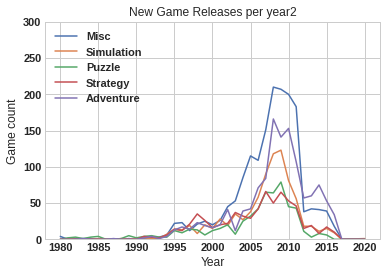

In [38]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt 
from matplotlib.pyplot import figure

plt.style.use('seaborn-whitegrid')

# ax = sns.relplot(data=Genre_Year_sum_merged1, kind="line");
# sns.set(rc={'figure.figsize':(1000, 700)})
Genre_Year_sum_merged1[['Misc','Simulation', 'Puzzle', 'Strategy', 'Adventure']].plot();
plt.title("New Game Releases per year2");
plt.ylabel("Game count");
# figure(figsize=(50, 35), dpi=100);
axes = plt.gca()
axes.set_ylim([0,300]);

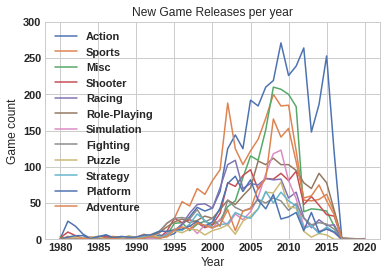

In [40]:
Genre_Year_sum_merged1[ ['Action', 'Sports', 'Misc', 'Shooter', 'Racing', 'Role-Playing', 'Simulation', 'Fighting', 'Puzzle', 'Strategy', 'Platform', 'Adventure']].plot();
plt.title("New Game Releases per year");
plt.ylabel("Game count");
axes = plt.gca()
axes.set_ylim([0,300])
plt.show();

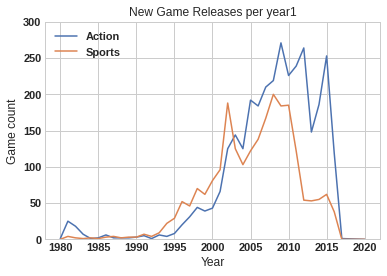

In [23]:
Genre_Year_sum_merged1[['Action', 'Sports']].plot();
plt.title("New Game Releases per year1");
plt.ylabel("Game count");
axes = plt.gca()
axes.set_ylim([0,300])
plt.show();

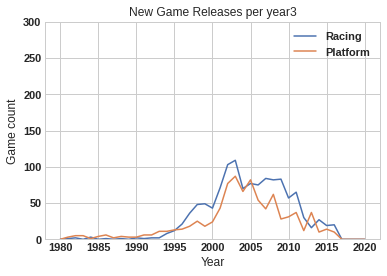

In [22]:
Genre_Year_sum_merged1[['Racing', 'Platform']].plot();
plt.title("New Game Releases per year3");
plt.ylabel("Game count");
axes = plt.gca()
axes.set_ylim([0,300])
plt.show()

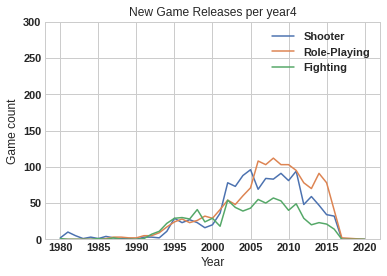

In [39]:
Genre_Year_sum_merged1[['Shooter', 'Role-Playing',  'Fighting']].plot();
plt.title("New Game Releases per year4");
plt.ylabel("Game count");
axes = plt.gca()
axes.set_ylim([0,300])
plt.show();

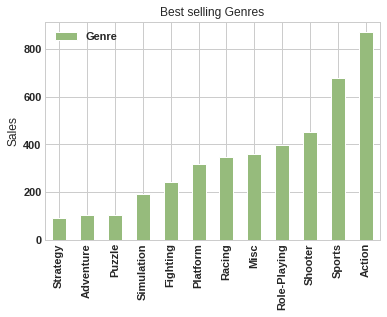

In [77]:
#Best selling games

df['Sales_sum'] = df['NA_Sales']+df['EU_Sales']+df['JP_Sales']+df['Other_Sales']
df_sales_sum = df[['Name', 'Sales_sum']]

best_sellers = df.sort_values('Sales_sum', ascending = False).drop('Unnamed: 0', axis = 1).head(4178)
bs = best_sellers[['Name', 'Platform',	'Year','Genre',	'Sales_sum']]
# best_sellers[['Platform', 'Publisher']].value_counts().to_frame()
bs2 = bs.Genre.value_counts().sort_values().to_frame()
bs2.plot.bar(color = '#96bb7c');
plt.title('Best selling Genres')
plt.ylabel('Sales')
 
plt.show();

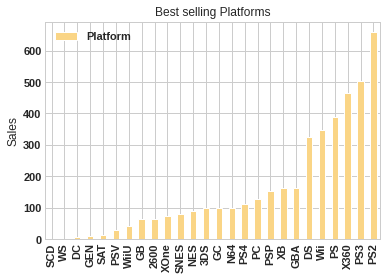

In [118]:
bs3 = bs.Platform.value_counts().sort_values().to_frame()
bs3.plot.bar(color = '#fad586')
plt.title('Best selling Platforms')
plt.ylabel('Sales')
plt.show();

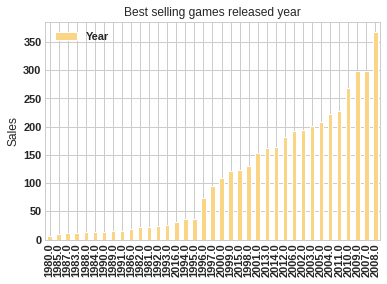

In [117]:
bs4 = bs.Year.value_counts().sort_values().to_frame()
bs4.plot.bar(color = '#fad586')
plt.title('Best selling games released year')
plt.ylabel('Sales')
plt.show();

In [125]:
bs.Platform.value_counts()

PS2     659
PS3     504
X360    464
PS      390
Wii     349
DS      324
GBA     162
XB      162
PSP     152
PC      128
PS4     113
N64     100
GC       99
3DS      99
NES      89
SNES     81
XOne     74
2600     64
GB       64
WiiU     41
PSV      28
SAT      12
GEN      11
DC        7
WS        1
SCD       1
Name: Platform, dtype: int64